# ImageNet Categories

In [48]:
import matplotlib.pyplot as plt
import pandas as pd
import rsatoolbox
from pathlib import Path
import re
import numpy as np
import rsatoolbox

In [49]:
dataset_v1 = Path('/s/babbage/b/nobackup/nblancha/public-datasets/bold5000')
dataset_v2 = Path('/s/babbage/b/nobackup/nblancha/public-datasets/bold5000r2')

In [149]:
def get_dataset(image_name):
    if re.match(r'^n[0-9]+', image_name):
        return 'ImageNet'
    elif re.match(r'^COCO', image_name):
        return 'COCO'
    else:
        return 'Scene'

def sort_rdms_by_list(rdms, order):
    df = pd.DataFrame.from_dict(rdms.pattern_descriptors)
    df = df.sort_values('supercategory', 
                        key=lambda column: column.map(lambda e: order.index(e)),
                        kind='stable')
    rdms.reorder(df.index)               
    
def sort_rdms_by_category(rdms):
    df = pd.DataFrame.from_dict(rdms.pattern_descriptors)
    df = df.sort_values(['dataset', 'supercategory', 'category', 'image'])
    rdms.reorder(df.index)
    
def sort_rdms(rdms):
    df = pd.DataFrame(rdms.pattern_descriptors['image'], columns=['image'])
    df['dataset'] = df.image.apply(get_dataset)
    df = df.sort_values(['dataset', 'image'])
    rdms.reorder(df.index)
    
def get_label_spans(labels):
    spans = []
    start = 0
    label = labels[0]
    for i, next_label in enumerate(labels):
        if label != next_label:
            spans.append((label, start, i))
            label = next_label
            start = i
    
    # Add last span
    spans.append((label, start, i))
    return spans
    
# def plot_rdm(
#     rdm,
#     descriptors,
#     ax=None,
#     cmap=rsatoolbox.vis.colors.rdm_colormap_classic(),
#     colorbar=True
# ):
#     if ax == None:
#         ax = plt.gca()
    
#     rdm_mean = rdm.dissimilarities[0].mean()
#     rdm_std = rdm.dissimilarities[0].std()
#     vmin = rdm_mean - rdm_std
#     vmax = rdm_mean + rdm_std
    
#     mat = rdm.get_matrices()[0]
#     mat[np.eye(rdm.n_cond, dtype=bool)] = np.nan

#     im = ax.imshow(mat, cmap=cmap, vmin=vmin, vmax=vmax, interpolation ='antialiased')
    
#     ax.set_title(rdm.rdm_descriptors['roi'][0], y=1.1)
    
#     spans = get_label_spans(rdm.pattern_descriptors[descriptors])
#     xticks = {x for s in spans for x in s[1:]}
#     labels = [s[0] for s in spans]
#     label_locs = [(s[1] + s[2])/2 for s in spans]
    
#     ax.set_xticks(list(xticks))
#     ax.set_yticks(list(xticks))
#     ax.set_xticks(label_locs, labels=labels, minor=True, rotation=30, ha='left')
#     ax.set_yticks(label_locs, labels=labels, minor=True, rotation=60, va='center')
#     ax.set_ylabel('Category')
#     ax.tick_params(
#         which='major',
#         top=True, bottom=False, left=True, right=False,
#         labeltop=False, labelbottom=False, labelleft=False, labelright=False,
#     )
#     ax.tick_params(
#         which='minor',
#         top=False, bottom=False, left=False, right=False, 
#         labeltop=True, labelbottom=False, labelleft=True, labelright=False, 
#     )
    
#     if colorbar:
#         cbar_label = rdm.dissimilarity_measure.capitalize() + ' Distance'
#         cbar = plt.colorbar(im, label=cbar_label, fraction=0.045, pad=0.04, orientation='horizontal', extend='both')
#         cbar.set_ticks([cbar.vmin, (cbar.vmin + cbar.vmax)/2, cbar.vmax])
#         cbar.set_ticklabels(['Lesser', 'Mean', 'Greater'])
    
#     return im

def rdm_colorbar(im, ax, fig, dissimilarity_measure=None):
    label = f'{dissimilarity_measure.title() + " " if dissimilarity_measure else ""}Distance'    
    cbar = fig.colorbar(im, label=label, ax=ax, fraction=0.045, pad=0.04, orientation='horizontal', extend='both')
    cbar.set_ticks([cbar.vmin, (cbar.vmin + cbar.vmax)/2, cbar.vmax])
    cbar.set_ticklabels(['$-1\sigma$', 'Mean', '$+1\sigma$'])
    
def plot_rdm(rdm, ax=None, cmap=rsatoolbox.vis.colors.rdm_colormap_classic(), colorbar=True, descriptor='layer'):
    if ax is None:
        ax = plt.gca()
    
    rdm_mean = rdm.dissimilarities[0].mean()
    rdm_std = rdm.dissimilarities[0].std()
    vmin = rdm_mean - rdm_std
    vmax = rdm_mean + rdm_std
    
    mat = rdm.get_matrices()[0]
    mat[np.eye(rdm.n_cond, dtype=bool)] = np.nan

    im = ax.imshow(mat, cmap=cmap, vmin=vmin, vmax=vmax, interpolation ='antialiased')
    
    ax.set_title(rdm.rdm_descriptors[descriptor][0], y=1.1)
    
    # datasets = [get_dataset(image) for image in rdm.pattern_descriptors['image']]
    spans = get_label_spans(rdm.pattern_descriptors['supercategory'])
    xticks = {x for s in spans for x in s[1:]}
    labels = [s[0] for s in spans]
    label_locs = [(s[1] + s[2])/2 for s in spans]
    
    ax.set_xticks(list(xticks))
    ax.set_yticks(list(xticks))
    ax.set_xticks(label_locs, labels=labels, minor=True, ha='center')
    ax.set_yticks(label_locs, labels=labels, minor=True, rotation='vertical', va='center')
    ax.set_ylabel('Dataset')
    ax.tick_params(
        which='major',
        top=True, bottom=False, left=True, right=False,
        labeltop=False, labelbottom=False, labelleft=False, labelright=False,
    )
    ax.tick_params(
        which='minor',
        top=False, bottom=False, left=False, right=False, 
        labeltop=True, labelbottom=False, labelleft=True, labelright=False, 
    )
    
    if colorbar:
        rdm_colorbar(im, ax, ax.get_figure(), rdm.dissimilarity_measure)
    
    return im
    
def plot_rdms(rdms, fig=None, ncols=3, colorbar=True, titlesize=16, **kwargs):
    if fig is None:
        fig = plt.gcf()
        
    model_name = rdms.descriptors.get('model', None)
    if model_name:
        title = f'Model: {model_name.replace("_", " ")}'
        fig.suptitle(title, fontsize=titlesize)
        
    # Upside-down floor division https://stackoverflow.com/questions/14822184/is-there-a-ceiling-equivalent-of-operator-in-python
    nrows = -(len(rdms) // -ncols) 
    axes = fig.subplots(nrows, ncols).ravel()
    
    for ax, rdm in zip(axes, rdms):
        plot_rdm(rdm, ax, colorbar=False, **kwargs)
        
    for ax in axes[len(rdms):]:
        fig.delaxes(ax)
        
    if colorbar:
        rdm_colorbar(axes[0].get_images()[0], axes, fig, rdms.dissimilarity_measure)
    

def plot_histogram(rdms, ax=None):
    if ax == None:
        ax = plt.gca()
        
    ax.hist(
        rdms.dissimilarities[0], 
        bins = 10000, 
        histtype='step'
    )
    
    ax.set_title(rdm.rdm_descriptors['roi'][0])
    
def get_single_pres(rdms):
    # Load listing of duplicate images from dataset
    repeat_df = pd.read_csv(
        dataset_v2 / 'BOLD5000_Stimuli' / 'Scene_Stimuli' / 'repeated_stimuli_113_list.txt',
        header=None,
        names=['image']
    )
    
    images_df = pd.DataFrame(rdms.pattern_descriptors['image'], columns=['image'])
    images_df = images_df[~images_df.image.isin(repeat_df.image)]
    return rdms.subsample_pattern('image', images_df.image.tolist())

In [51]:
rdm = rsatoolbox.rdm.load_rdm(str(dataset_v2 / 'MEAN_vcAtlas_CORR_RDMs.h5'))

In [52]:
dataset = [get_dataset(image) for image in rdm.pattern_descriptors['image']]

In [53]:
rdm.pattern_descriptors['dataset'] = dataset

In [54]:
in_rdm = rdm.subset_pattern('dataset', 'ImageNet')

In [55]:
df = pd.read_pickle(dataset_v2 / 'imagenet_categories.pkl')

In [56]:
df = df[~df.index.duplicated(keep='first')]

In [57]:
category = [df.loc[image]['category'] for image in in_rdm.pattern_descriptors['image']]

In [58]:
supercategory = [df.loc[image]['supercategory'] for image in in_rdm.pattern_descriptors['image']]

In [59]:
in_rdm.pattern_descriptors['category'] = category

In [60]:
in_rdm.pattern_descriptors['supercategory'] = supercategory

In [61]:
sort_rdms_by_category(in_rdm)

In [62]:
sort_rdms_by_list(in_rdm, ['vertebrate', 'invertebrate', 'natural_object', 'artifact', 'place'])

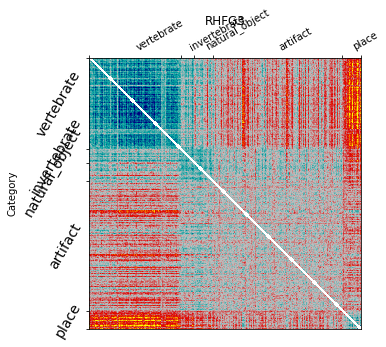

In [85]:
fig, ax = plt.subplots(figsize=(5,5), facecolor='w')
plot_rdm(in_rdm[10], 'supercategory', ax=ax, colorbar=False)

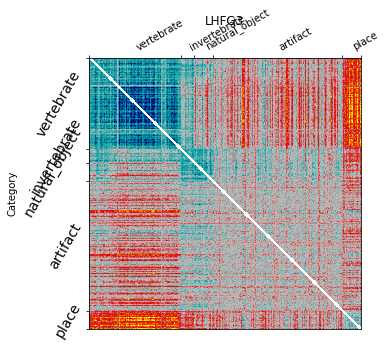

In [86]:
fig, ax = plt.subplots(figsize=(5,5), facecolor='w')
plot_rdm(in_rdm[2], 'supercategory', ax=ax, colorbar=False)

In [64]:
# params = {"ytick.color" : "w",
#           "xtick.color" : "w",
#           "axes.labelcolor" : "w",
#           "axes.edgecolor" : "w"}
params = {"ytick.color" : "k",
          "xtick.color" : "k",
          "axes.labelcolor" : "k",
          "axes.edgecolor" : "k"}
plt.rcParams.update(params)

In [20]:
pd.set_option("display.max_rows", None)
df.sort_values(['category', 'image'])

dataset                               synset  \
image                                                                  
n01440764_10110.JPEG   ImageNet                           tench.n.01   
n01440764_13744.JPEG   ImageNet                           tench.n.01   
n01443537_1087.JPEG    ImageNet                        goldfish.n.01   
n01443537_2819.JPEG    ImageNet                        goldfish.n.01   
n01484850_13992.JPEG   ImageNet               great_white_shark.n.01   
n01484850_22362.JPEG   ImageNet               great_white_shark.n.01   
n01491361_3094.JPEG    ImageNet                     tiger_shark.n.01   
n01491361_6719.JPEG    ImageNet                     tiger_shark.n.01   
n01494475_3853.JPEG    ImageNet                      hammerhead.n.03   
n01494475_6207.JPEG    ImageNet                      hammerhead.n.03   
n01496331_1499.JPEG    ImageNet                    electric_ray.n.01   
n01496331_7150.JPEG    ImageNet                    electric_ray.n.01   
n01498041_6496.JPEG    ImageNet                        stingray.n.01   
n01498041_984.JPEG     ImageNet                        stingray.n.01   
n01514668_15569.JPEG   ImageNet                            cock.n.05   
n01514668_4281.JPEG    ImageNet                            cock.n.05   
n01514859_10095.JPEG   ImageNet                             hen.n.02   
n01514859_8220.JPEG    ImageNet                             hen.n.02   
n01518878_5028.JPEG    ImageNet                         ostrich.n.02   
n01518878_6971.JPEG    ImageNet                         ostrich.n.02   
n01530575_3746.JPEG    ImageNet                       brambling.n.01   
n01530575_8174.JPEG    ImageNet                       brambling.n.01   
n01531178_2651.JPEG    ImageNet                       goldfinch.n.02   
n01531178_5970.JPEG    ImageNet                       goldfinch.n.02   
n01532829_11283.JPEG   ImageNet                     house_finch.n.01   
n01532829_14533.JPEG   ImageNet                     house_finch.n.01   
n01534433_436.JPEG     ImageNet                           junco.n.01   
n01534433_5650.JPEG    ImageNet                           junco.n.01   
n01537544_1343.JPEG    ImageNet                  indigo_bunting.n.01   
n01537544_5373.JPEG    ImageNet                  indigo_bunting.n.01   
n01558993_2306.JPEG    ImageNet                           robin.n.02   
n01558993_5976.JPEG    ImageNet                           robin.n.02   
n01560419_1342.JPEG    ImageNet                          bulbul.n.01   
n01560419_9017.JPEG    ImageNet                          bulbul.n.01   
n01580077_3341.JPEG    ImageNet                             jay.n.02   
n01580077_8319.JPEG    ImageNet                             jay.n.02   
n01582220_120.JPEG     ImageNet                          magpie.n.01   
n01582220_3174.JPEG    ImageNet                          magpie.n.01   
n01592084_5227.JPEG    ImageNet                       chickadee.n.01   
n01592084_5666.JPEG    ImageNet                       chickadee.n.01   
n01601694_10357.JPEG   ImageNet                     water_ouzel.n.01   
n01601694_8281.JPEG    ImageNet                     water_ouzel.n.01   
n01608432_13826.JPEG   ImageNet                            kite.n.04   
n01608432_16455.JPEG   ImageNet                            kite.n.04   
n01614925_1006.JPEG    ImageNet                      bald_eagle.n.01   
n01614925_407.JPEG     ImageNet                      bald_eagle.n.01   
n01616318_626.JPEG     ImageNet                         vulture.n.01   
n01616318_6656.JPEG    ImageNet                         vulture.n.01   
n01622779_5410.JPEG    ImageNet                  great_grey_owl.n.01   
n01622779_7389.JPEG    ImageNet                  great_grey_owl.n.01   
n01629819_19393.JPEG   ImageNet        european_fire_salamander.n.01   
n01629819_519.JPEG     ImageNet        european_fire_salamander.n.01   
n01630670_2697.JPEG    ImageNet                     common_newt.n.01   
n01630670_321.JPEG     ImageNet                     common_newt.

## Model Comparison

In [185]:
cat_rdms = [rsatoolbox.rdm.get_categorical_rdm([1 if c == category else 0 for c in in_rdm.pattern_descriptors['supercategory']], category) for category in set(in_rdm.pattern_descriptors['supercategory'])]

In [90]:
cat_rdms = []
for category in sorted(set(in_rdm.pattern_descriptors['supercategory'])):
    cat_pattern = [1 if c == category else 0 for c in in_rdm.pattern_descriptors['supercategory']]
    cat_rdm = rsatoolbox.rdm.get_categorical_rdm(cat_pattern, category)
    cat_rdm.pattern_descriptors = in_rdm.pattern_descriptors
    cat_rdm.rdm_descriptors['category'] = [category]
    cat_rdms.append(cat_rdm)

In [91]:
cat_rdms = rsatoolbox.rdm.rdms.concat(cat_rdms)

In [92]:
set(in_rdm.pattern_descriptors['supercategory'])

{'artifact', 'invertebrate', 'natural_object', 'place', 'vertebrate'}

(<Figure size 432x288 with 6 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object),
 defaultdict(dict,
             {<AxesSubplot:>: {'image': <matplotlib.image.AxesImage at 0x7f320c745b80>},
              <AxesSubplot:>: {'image': <matplotlib.image.AxesImage at 0x7f3209685d90>},
              <AxesSubplot:>: {'image': <matplotlib.image.AxesImage at 0x7f32065c1c40>},
              <AxesSubplot:>: {'image': <matplotlib.image.AxesImage at 0x7f3203437280>},
              <AxesSubplot:>: {'image': <matplotlib.image.AxesImage at 0x7f32002cb880>}}))

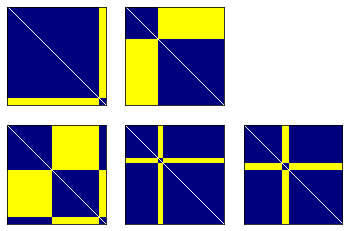

In [93]:
rsatoolbox.vis.show_rdm(cat_rdms, cmap='classic')

In [223]:
model = rsatoolbox.model.ModelWeighted('Categorical', cat_rdms)

In [ ]:
theta = rsatoolbox.model.fitter.fit_optimize_positive(model, in_rdm[2], method='corr')

In [96]:
theta

array([1.73565093e-01, 3.86359075e-11, 1.16883849e-10, 8.29447022e-01,
       5.30935774e-01])

In [103]:
results = rsatoolbox.inference.eval_bootstrap_pattern(model, in_rdm[2], theta=[theta], method='corr', pattern_descriptor='supercategory')

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [06:31<00:00,  2.56it/s]


In [104]:
print(results)

Results for running bootstrap_pattern evaluation for corr on 1 models:

Model |   Eval ± SEM   | p (against 0) | p (against NC) |
---------------------------------------------------------
FG3   |  0.186 ± 0.117 |          nan  |           nan  |

p-values are based on uncorrected t-tests


In [102]:
results.noise_ceiling

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

(<Figure size 900x720 with 2 Axes>, <Axes:>, <Axes:>)

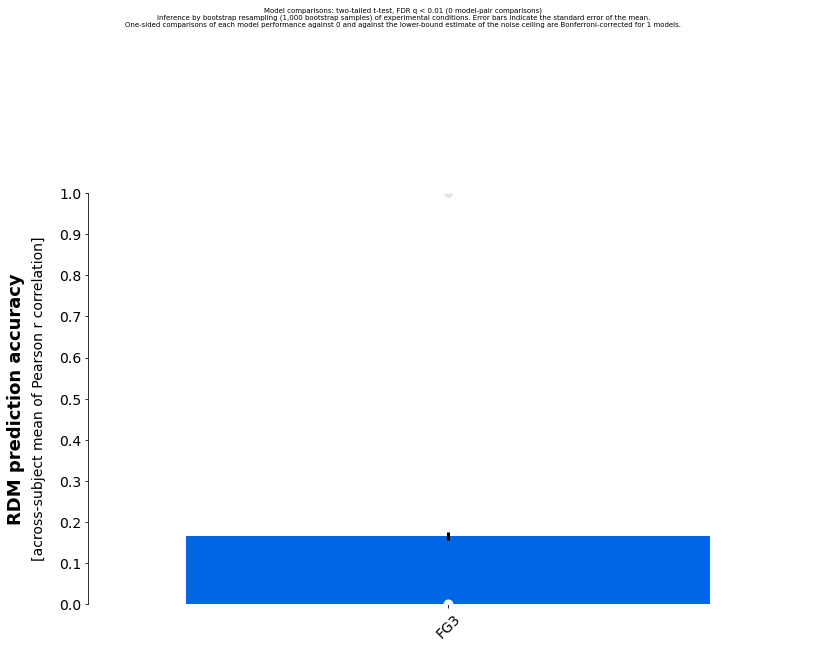

In [99]:
rsatoolbox.vis.plot_model_comparison(results)

In [71]:
pred_rdm = model.predict_rdm(theta)
pred_rdm.rdm_descriptors['roi'] = ['Categorical Model']
pred_rdm.pattern_descriptors = in_rdm.pattern_descriptors
pred_rdm.dissimilarity_measure = in_rdm.dissimilarity_measure

(<Figure size 144x144 with 1 Axes>,
 array([[<AxesSubplot:>]], dtype=object),
 defaultdict(dict,
             {<AxesSubplot:>: {'image': <matplotlib.image.AxesImage at 0x7f3218dfae80>}}))

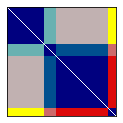

In [72]:
rsatoolbox.vis.show_rdm(pred_rdm, cmap='classic')

KeyError: 'layer'

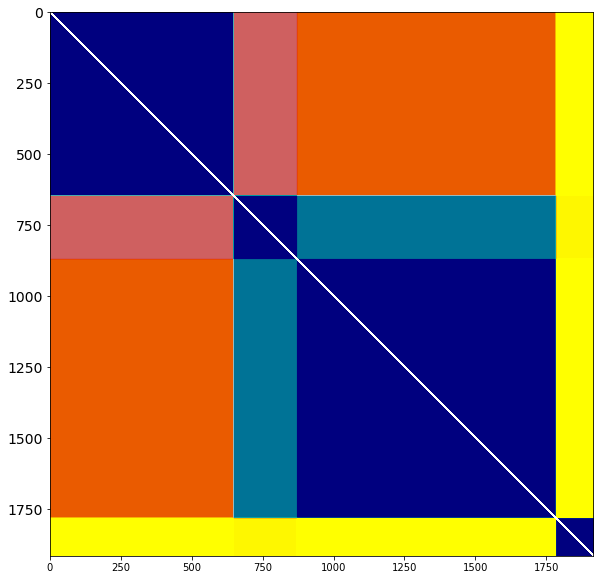

In [198]:
fig, ax = plt.subplots(figsize=(10,10), facecolor='w')
plot_rdm(pred_rdm, ax=ax, colorbar=True)

In [74]:
theta

array([1.73565093e-01, 3.86359075e-11, 1.16883849e-10, 8.29447022e-01,
       5.30935774e-01])

In [251]:
model

In [254]:
str(results)

'<rsatoolbox.inference.result.Result object at 0x7f721831b4f0>'

In [255]:
results.summary()

AttributeError: 'Result' object has no attribute 'summary'

In [257]:
rsatoolbox.__version__

AttributeError: module 'rsatoolbox' has no attribute '__version__'

## CNN Analysis

In [158]:
fmri_rdms = []
for subject in range(1,4):
    fmri_path = dataset_v2 / f'CSI{subject}_vcAtlas_CORR_RDMs.h5'
    fmri_rdm = rsatoolbox.rdm.load_rdm(str(fmri_path)).subset('roi','LHFG3')
    fmri_rdm.pattern_descriptors['dataset'] = [get_dataset(image) for image in fmri_rdm.pattern_descriptors['image']]
    fmri_rdm = fmri_rdm.subset_pattern('dataset', 'ImageNet')
    fmri_rdm.pattern_descriptors['category'] = [df.loc[image]['category'] for image in fmri_rdm.pattern_descriptors['image']]
    fmri_rdm.pattern_descriptors['supercategory'] = [df.loc[image]['supercategory'] for image in fmri_rdm.pattern_descriptors['image']]                
    fmri_rdm.rdm_descriptors['subject'] = [f'CSI{subject}']
    fmri_rdms.append(fmri_rdm)

In [159]:
data_rdms = rsatoolbox.rdm.rdms.concat(fmri_rdms)

In [160]:
sort_rdms_by_category(data_rdms)

In [161]:
sort_rdms_by_list(data_rdms, ['vertebrate', 'invertebrate', 'natural_object', 'artifact', 'place'])

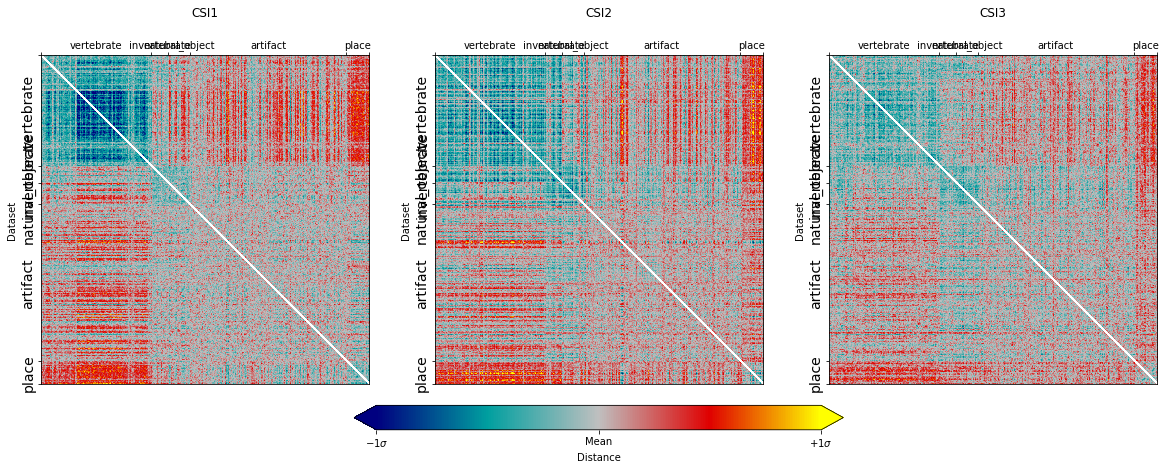

In [162]:
fig = plt.figure(figsize=(20,10), facecolor='w')
plot_rdms(data_rdms, fig=fig, descriptor='subject')

In [171]:
dnn_models = []
for dnn in ['ResNet50', 'efficientnet', 'mobilenet', 'AlexNet']:
    dnn_path = next((dataset_v2 / 'rdms').glob(f'**/*{dnn}*.h5'))
    dnn_rdm = rsatoolbox.rdm.load_rdm(str(dnn_path))
    dnn_rdm.pattern_descriptors['image'] = [image.replace('jpg', 'JPEG') for image in dnn_rdm.pattern_descriptors['image']]
    dnn_rdm.pattern_descriptors['dataset'] = [get_dataset(image) for image in dnn_rdm.pattern_descriptors['image']]
    dnn_rdm = dnn_rdm.subset_pattern('dataset', 'ImageNet')
    dnn_rdm.pattern_descriptors['category'] = [df.loc[image]['category'] for image in dnn_rdm.pattern_descriptors['image']]
    dnn_rdm.pattern_descriptors['supercategory'] = [df.loc[image]['supercategory'] for image in dnn_rdm.pattern_descriptors['image']]
    dnn_model = rsatoolbox.model.ModelWeighted(dnn, dnn_rdm)
    dnn_models.append(dnn_model)

In [174]:
dnn_thetas = [rsatoolbox.model.fitter.fit_optimize_positive(model, in_rdm[2], method='corr') for model in dnn_models]

In [175]:
dnn_thetas

[array([9.74300982e-03, 2.14860292e-09, 3.46591869e-13, 9.84839962e-01,
        1.73191582e-01]),
 array([3.13401220e-08, 1.18968289e-01, 1.02141715e-01, 6.37206036e-01,
        5.55060555e-07, 5.91626596e-09, 4.58444384e-01, 4.82260446e-01,
        2.51629669e-01, 2.51631084e-01]),
 array([4.96348029e-09, 6.28259873e-10, 4.93704335e-09, 8.77195515e-02,
        2.44728709e-06, 2.50066629e-01, 3.08162309e-06, 2.81967386e-08,
        3.96108876e-08, 2.13610951e-08, 3.84068653e-01, 1.77603727e-04,
        2.36053753e-02, 3.57400685e-08, 3.87986984e-01, 2.56043230e-09,
        7.46823987e-01, 1.91604518e-01, 1.91608263e-01]),
 array([1.23553469e-10, 2.95232741e-10, 1.06047170e-10, 9.69932514e-01,
        2.43374030e-01])]

In [192]:
predict_rdms = [model.predict_rdm(theta) for model, theta in zip(dnn_models, dnn_thetas)]

In [193]:
predict_rdms = rsatoolbox.rdm.rdms.concat(predict_rdms)
predict_rdms.rdm_descriptors['model'] = [model.name for model in dnn_models]

In [195]:
sort_rdms_by_category(predict_rdms)
sort_rdms_by_list(predict_rdms, ['vertebrate', 'invertebrate', 'natural_object', 'artifact', 'place'])

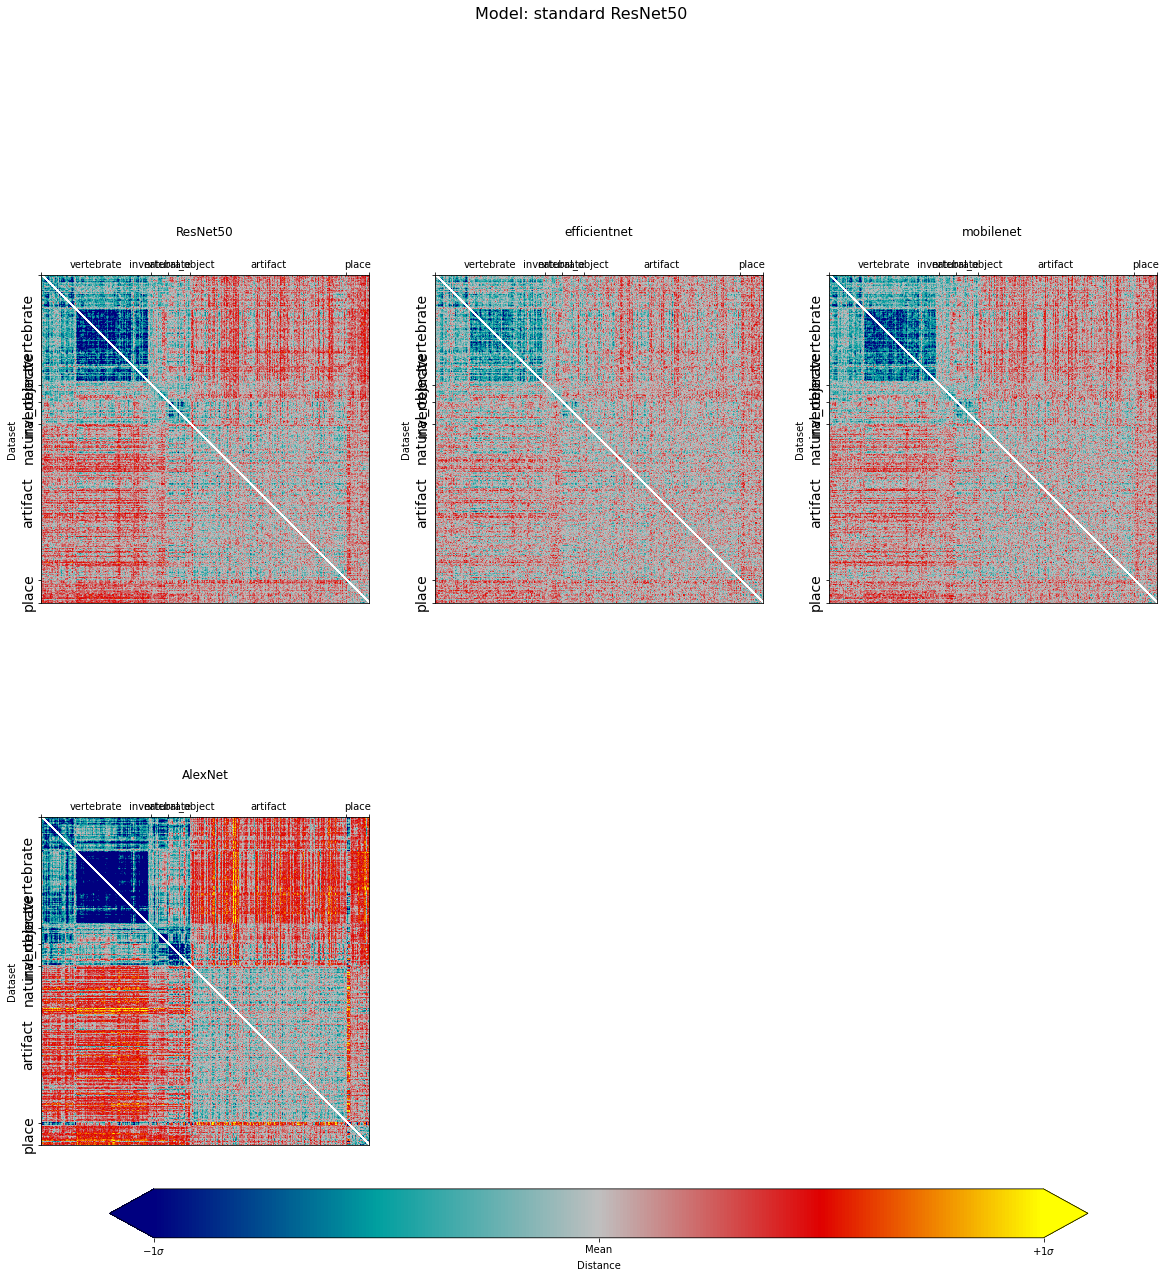

In [199]:
fig = plt.figure(figsize=(20,20), facecolor='w')
plot_rdms(predict_rdms, descriptor='model')

In [201]:
results = rsatoolbox.inference.eval_bootstrap_pattern(
    dnn_models,
    data_rdms,
    theta=dnn_thetas,
    method='corr',
    pattern_descriptor='image',
    rdm_descriptor='subject',
    N=10
)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:21<00:00,  2.11s/it]


In [203]:
print(results)

Results for running bootstrap_pattern evaluation for corr on 4 models:

Model        |   Eval ± SEM   | p (against 0) | p (against NC) |
----------------------------------------------------------------
ResNet50     |  0.020 ± 0.002 |      < 0.001  |       < 0.001  |
efficientnet |  0.011 ± 0.001 |      < 0.001  |       < 0.001  |
mobilenet    |  0.016 ± 0.002 |      < 0.001  |       < 0.001  |
AlexNet      |  0.033 ± 0.003 |      < 0.001  |       < 0.001  |

p-values are based on uncorrected t-tests


In [204]:
results.noise_ceiling

array([[0.0823992 , 0.09621294, 0.08050585, 0.0861854 , 0.07935511,
        0.08011324, 0.07816177, 0.0736062 , 0.09068216, 0.08865744],
       [0.61099615, 0.61659833, 0.61020664, 0.61252588, 0.60973754,
        0.61005281, 0.60925441, 0.60739338, 0.61436472, 0.61353824]])

(<Figure size 900x720 with 2 Axes>, <Axes:>, <Axes:>)

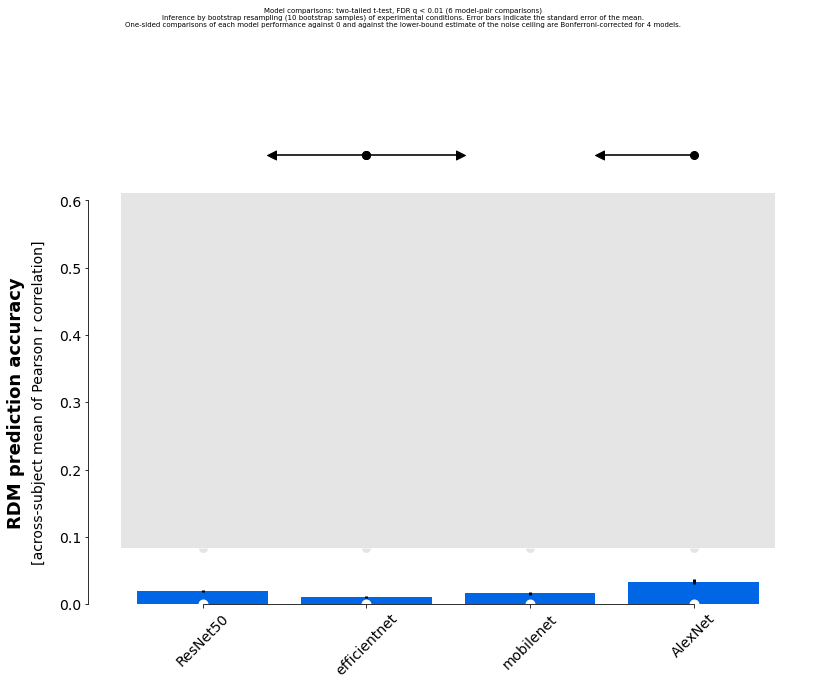

In [205]:
rsatoolbox.vis.plot_model_comparison(results)

In [207]:
models = [model] + dnn_models
thetas = [theta] + dnn_thetas

In [244]:
results = rsatoolbox.inference.eval_bootstrap(
    models,
    data_rdms,
    theta=thetas,
    method='corr',
    pattern_descriptor='image',
    rdm_descriptor='subject',
    N=1000,
)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [34:53<00:00,  2.09s/it]


In [245]:
print(results)

Results for running bootstrap evaluation for corr on 5 models:

Model        |   Eval ± SEM   | p (against 0) | p (against NC) |
----------------------------------------------------------------
FG3          |  0.098 ± 0.010 |        0.005  |         0.818  |
ResNet50     |  0.019 ± 0.005 |        0.027  |         0.654  |
efficientnet |  0.010 ± 0.002 |        0.026  |         0.637  |
mobilenet    |  0.016 ± 0.003 |        0.023  |         0.647  |
AlexNet      |  0.033 ± 0.007 |        0.021  |         0.680  |

p-values are based on uncorrected t-tests


In [226]:
print(results)

Results for running bootstrap evaluation for corr on 5 models:

Model        |   Eval ± SEM   | p (against 0) | p (against NC) |
----------------------------------------------------------------
FG3          |  0.100 ± 0.009 |        0.004  |         0.782  |
ResNet50     |  0.020 ± 0.004 |        0.022  |         0.638  |
efficientnet |  0.010 ± 0.002 |        0.026  |         0.623  |
mobilenet    |  0.016 ± 0.003 |        0.019  |         0.633  |
AlexNet      |  0.033 ± 0.006 |        0.017  |         0.663  |

p-values are based on uncorrected t-tests


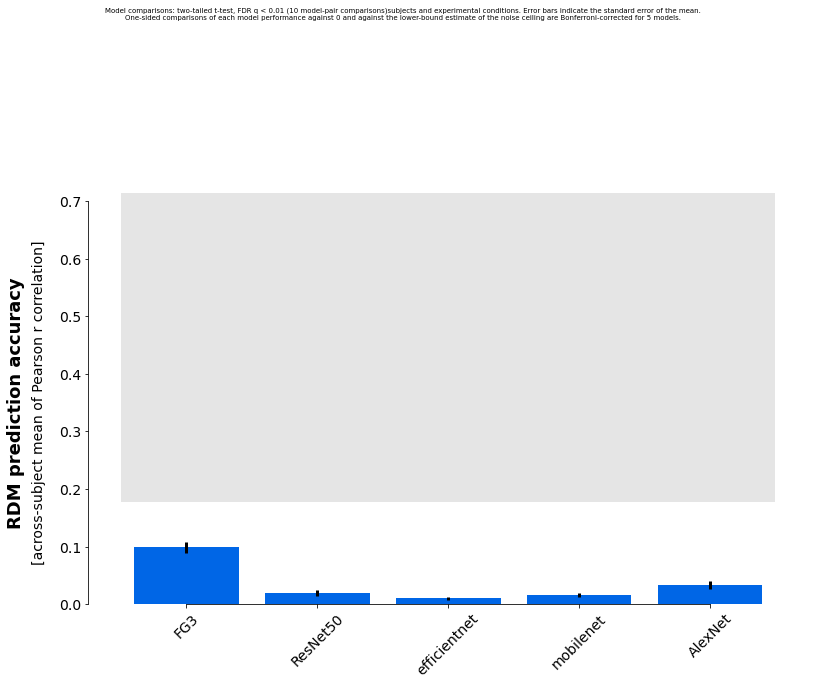

In [246]:
fig, ax, _ = rsatoolbox.vis.plot_model_comparison(results)
fig.set_facecolor('w')

In [228]:
results.noise_ceiling

array([[0.05095052, 0.08224027, 0.04322535, 0.08340663, 0.07904415,
        0.05967286, 0.04816069, 0.08323811, 0.0872519 , 0.05617035,
        1.        , 0.05050279, 0.05096609, 1.        , 1.        ,
        0.0716061 , 0.07310306, 0.07692554, 0.08313444, 0.07973416],
       [0.69105584, 0.61091896, 0.68802195, 0.61137615, 0.70198976,
        0.69446707, 0.68996157, 0.6113269 , 0.61296103, 0.69309908,
        1.        , 0.69088033, 0.69106195, 1.        , 1.        ,
        0.69910985, 0.69969031, 0.70117054, 0.61129276, 0.60989714]])

In [234]:
results.noise_ceiling

array([[0.05272342, 0.08314779, 1.        , 0.08277861, 0.07835768,
        0.07256811, 0.06258993, 0.0502546 , 0.04798797, 0.06864782,
        1.        , 0.09161625, 0.04514645, 0.0752827 , 0.06912889,
        0.04630459, 0.08171809, 0.08060756, 0.08768013, 0.07926609,
        1.        , 0.0467035 , 0.07344834, 0.07749395, 0.07220264,
        0.05302683, 0.04671933, 0.08571375, 0.06074998, 0.06057599,
        0.07511718, 0.05091289, 0.05756461, 1.        , 0.05419929,
        0.06081572, 0.07689254, 1.        , 0.05269542, 0.05676558],
       [0.69175043, 0.61129172, 1.        , 0.61113249, 0.60932817,
        0.69948293, 0.69560457, 0.69078303, 0.68989378, 0.69796148,
        1.        , 0.70683346, 0.68877753, 0.70053471, 0.69814834,
        0.68923268, 0.70302247, 0.70259373, 0.61312537, 0.6097077 ,
        1.        , 0.6893894 , 0.69982414, 0.70139042, 0.69934122,
        0.69186924, 0.68939561, 0.70456312, 0.69488729, 0.69481942,
        0.70047062, 0.69104109, 0.69364394, 1. 

In [235]:
results

rsatoolbox.inference.Result
containing evaluations for 5 models
evaluated using bootstrap of corr